## Importing Libraries.
Load  TechFest dataset using pandas.<br>
Doing math (like averages, standard deviation) with numpy.<br>
Create plots like histograms, bar charts, boxplots with matplotlib and seaborn.<br>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV.
Here the CSV file is imported to read data.<br>

In [79]:
df = pd.read_csv('TechFest2025_participants.csv')
df.head()

,Name,City,Profession,Age,Workshop,Presentation_Score,Feedback_Rating,Participation_Status
0,Sana Tariq,Faisalabad,Front-end Developer,NaN,Ethical Hacking,67.0,1,Cancelled
1,Rameen Tariq,Multan,AI Researcher,41.0,Cyber Defense,83.0,3,Confirmed
2,Umar Khalid,Lahore,Front-end Developer,NaN,Ethical Hacking,70.0,2,Cancelled
3,Kiran Siddiqui,Peshawar,DevOps Engineer,32.0,Product Strategy,76.0,5,Cancelled
4,Nida Farooq,Islamabad,Web Developer,29.0,Deep Learning,67.0,4,Confirmed


### Shape.
It shows the shape of data (like: how many Rows and Coloums are used in dataset).<br>

In [80]:
df.shape

(500, 8)

### DataType 
Shows the datatype of each coloum in dataset.<br>

In [81]:
df.dtypes

Name                     object
City                     object
Profession               object
Age                     float64
Workshop                 object
Presentation_Score      float64
Feedback_Rating           int64
Participation_Status     object
dtype: object

## Scatter plot.
To visually analyze the relationship between Age and Presentation Score, while distinguishing between different Participation Statuses.<br>
### Purpose.
#### plt.figure(figsize=(8, 6))
Sets the size of the figure to 8 inches wide and 6 inches tall.<br>
A larger size improves readability, especially when plotting many data points.<br>
#### sns.scatterplot(...)
This is the main part where Seaborn creates the scatter plot:.<br>
data=scatter_data: Uses the scatter_data DataFrame that should contain at least three columns:.<br>
'Age', 'Presentation_Score', and 'Participation_Status'.<br>
x='Age': Sets the X-axis to show participants’ ages.<br>
y='Presentation_Score': Sets the Y-axis to show their presentation scores.<br>
hue='Participation_Status': Colors the dots based on their status (e.g., Confirmed, Pending, Cancelled), so we can visually compare how participation status might relate to performance.<br>

#### plt.title(...), plt.xlabel(...), plt.ylabel(...)
Adds a clear title and axis labels to explain what the chart shows.<br>

#### plt.grid(True)
Adds a background grid to help you align and compare points easily.<br>

#### plt.show()
Finally displays the scatter plot on the screen.<br>
### Findings.
Whether age has any influence on presentation score.<br>
If certain participation statuses (like Confirmed) perform better than others..<br>
If there are any outliers (e.g., very young or old participants scoring extremely high or low)..<br>
(No outliers in the graph).<br>

### Importance.
Helps detect patterns or clusters (e.g., younger participants scoring higher).<br>
Identifies gaps or biases in the data.<br>
Good for deciding which variables may be correlated and worth further analysis.<br>

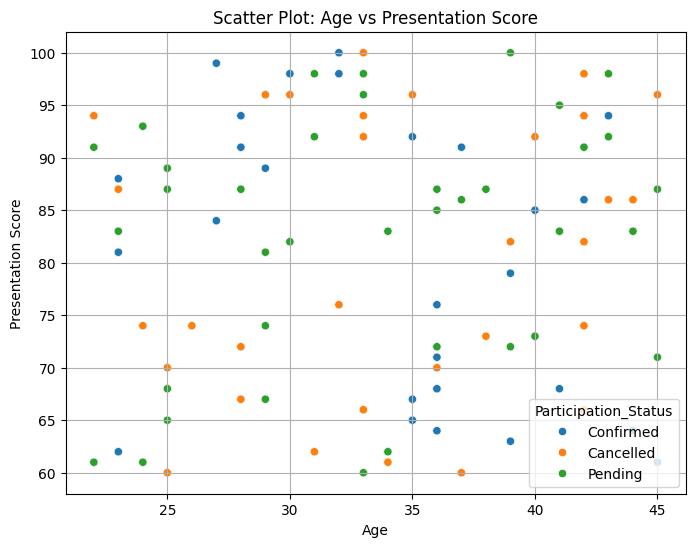

In [82]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=scatter_data,
    x='Age',
    y='Presentation_Score',
    hue='Participation_Status'
)

plt.title('Scatter Plot: Age vs Presentation Score')
plt.xlabel('Age')
plt.ylabel('Presentation Score')
plt.grid(True)
plt.show()


###  Purpose.
To create a two-way frequency table (called a crosstab) that shows how many participants of each Participation Status (e.g., Confirmed, Cancelled, Pending) are associated with each Workshop.<br>
### Explanation.
pd.crosstab(df['Workshop'], df['Participation_Status']).<br>
pd.crosstab(...) is a Pandas function that creates a contingency table.<br>
df['Workshop']: This becomes the rows of the table — each row represents a different workshop (e.g., Python, AR Design, etc.).<br>
df['Participation_Status']: This becomes the columns — each column shows a participation status (e.g., Confirmed, Pending, Cancelled).<br>
### Findings.
It counts how many participants fall under each combination of Workshop and Participation_Status.<br>
How many people are Confirmed, Cancelled, or Pending in each Workshop.<br>

### Importance.
Helps you see popularity trends among workshops.<br>
Identifies if a certain workshop has higher cancellations or no-shows.<br>
Aids in making logistics and planning decisions (like which sessions need more capacity).<br>

In [83]:
# Create a crosstab of Workshop vs Participation Status
crosstab = pd.crosstab(df['Workshop'], df['Participation_Status'])

# Display the crosstab
crosstab


Participation_Status,Cancelled,Confirmed,Pending
Workshop,,,
AI in Healthcare,15,12,18
Cloud Computing,9,6,15
Cyber Defense,19,13,18
Data Storytelling,11,19,20
Deep Learning,6,13,6
Design Thinking,8,16,21
Ethical Hacking,15,9,6
Kubernetes 101,14,25,11
ML Ops,13,9,13


###  Purpose.
To calculate the percentage distribution of Participation Status within each Workshop — instead of raw counts, it shows what percentage of participants fall into Confirmed, Cancelled, or Pending per workshop.<br>
### Explanation.
crosstab.div(crosstab.sum(axis=1), axis=0) * 100.<br>
crosstab.sum(axis=1): Calculates the total participants for each Workshop (row-wise sum).<br>

crosstab.div(..., axis=0): Divides each value in a row by that row’s total to get the proportion per participation status.<br>

* 100: Converts proportions into percentages.<br>

.round(2).<br>
Rounds the percentages to 2 decimal places for a cleaner display.<br>
### Findings.
What percent of participants in each workshop have confirmed, cancelled, or are pending.<br>

### Importance.
Shows the engagement level of participants per workshop.<br>
Helps identify workshops with high pending or cancellation rates.<br>
Useful for making data-driven decisions about which workshops need attention or follow-up.<br>

In [84]:
# Calculate percentage per workshop
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Round and display
crosstab_percentage.round(2)


Participation_Status,Cancelled,Confirmed,Pending
Workshop,,,
AI in Healthcare,33.33,26.67,40.00
Cloud Computing,30.00,20.00,50.00
Cyber Defense,38.00,26.00,36.00
Data Storytelling,22.00,38.00,40.00
Deep Learning,24.00,52.00,24.00
Design Thinking,17.78,35.56,46.67
Ethical Hacking,50.00,30.00,20.00
Kubernetes 101,28.00,50.00,22.00
ML Ops,37.14,25.71,37.14


## Stacked bar chart.
To visualize the crosstab table of Workshop vs Participation Status using a stacked bar chart, showing how many participants fall into each participation status category per workshop.<br>
### Explanation.
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6)).<br>
crosstab: This is the table you previously created using pd.crosstab(), showing counts of participation statuses per workshop.<br>

kind='bar': Plots the data as bar charts.<br>

stacked=True: Stacks the bars by Participation_Status for each workshop, making it easier to compare total and split values.<br>

figsize=(10, 6): Sets the size of the plot.<br>
### Styling.
plt.title(...): Sets the title of the chart.<br>
plt.xlabel(...): Labels the x-axis as "Workshop".<br>
plt.ylabel(...): Labels the y-axis as "Number of Participants".<br>
plt.xticks(rotation=45, ha='right'): Rotates x-axis labels for better readability.<br>
plt.legend(title='Participation Status'): Adds a legend titled "Participation Status".<br>
plt.tight_layout(): Adjusts layout to prevent overlapping.<br>
plt.grid(True, axis='y'): Adds horizontal grid lines to improve readability.<br>


### What It Shows:
A stacked bar for each workshop, broken down by:.<br>
Confirmed.<br>
Cancelled.<br>
Pending.<br>
Each bar shows the total number of participants, and you can visually compare:.<br>
Which workshop has the highest attendance.<br>
Which one has more cancellations or pending participants.<br>
### Importance.
Gives a clear visual comparison between workshops.<br>
Helps organizers identify workshops with high interest or issues (e.g., high cancellation).<br>
Great for presentations and reports to show workshop engagement at a glance.<br>

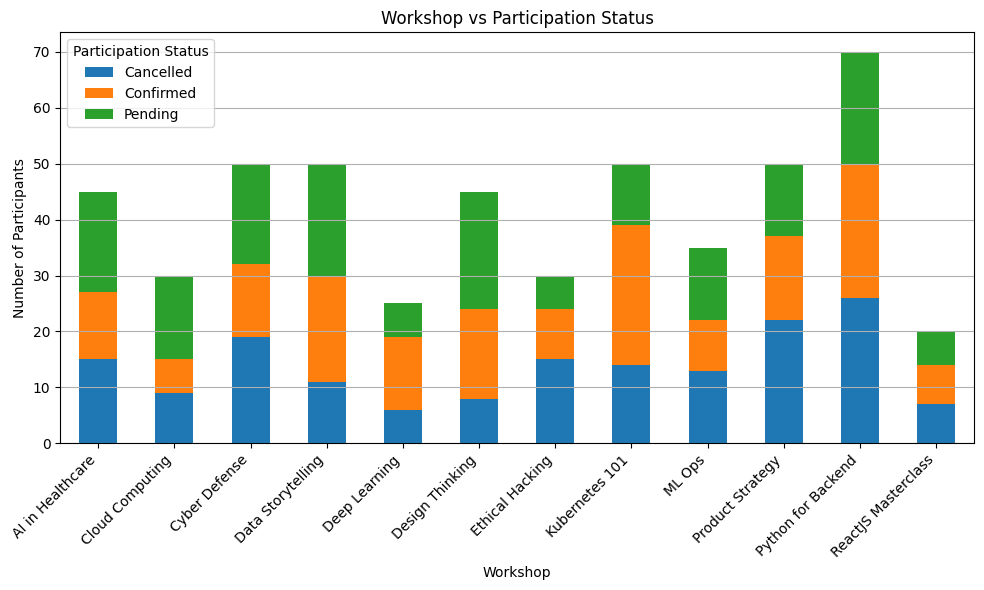

In [85]:
# Plot stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Workshop vs Participation Status')
plt.xlabel('Workshop')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Participation Status')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


###  Purpose.
To analyze the average Presentation Scores across different Workshops and Participation Statuses, using a pivot table.<br>
### Explanation:
#### pivot = pd.pivot_table(...)
This creates a pivot table from your TechFest2025 dataset df.<br>

#### Parameters:
values='Presentation_Score': You're analyzing the Presentation Score column.<br>
index='Workshop': Rows will be grouped by Workshop.<br>
columns='Participation_Status': Columns will split by Participation Status (e.g., Confirmed, Cancelled, Pending).<br>
aggfunc='mean': The function to apply is the mean (average) of scores.<br>

The result: For each workshop, you’ll get the average Presentation Score for each participation status.<br>

#### pivot.round(2)
Rounds the pivot table values to 2 decimal places, for cleaner and more readable output.<br>

### Findings.
This pivot table shows:.<br>
How well participants scored (on average) in each workshop.<br>
How scores vary based on whether the participant Confirmed, Cancelled, or is Pending.<br>
 Example insight: You might discover that participants who confirmed attendance gave higher presentation scores in some workshops.<br>
 ### Importance.
Helps evaluate workshop effectiveness by looking at feedback scores.<br>
Highlights whether a particular status group (like Confirmed participants) tends to give better or worse scores.<br>
Enables comparative analysis across workshops and participant groups.<br>

In [86]:
# Pivot table: average Presentation_Score per Workshop and Participation Status
pivot = pd.pivot_table(
    df,
    values='Presentation_Score',
    index='Workshop',
    columns='Participation_Status',
    aggfunc='mean'
)

# Show result
pivot.round(2)


Participation_Status,Cancelled,Confirmed,Pending
Workshop,,,
AI in Healthcare,79.00,81.08,83.12
Cloud Computing,89.57,81.40,90.54
Cyber Defense,87.12,83.00,85.00
Data Storytelling,78.00,82.53,82.55
Deep Learning,76.75,79.83,80.80
Design Thinking,71.57,76.33,76.90
Ethical Hacking,77.23,82.78,80.80
Kubernetes 101,68.79,70.54,77.30
ML Ops,83.92,83.75,87.64


###  Purpose.
To handle missing values (NaNs) in the pivot table by filling them with 0, so the table is complete and easier to read or use in further analysis or visualization.<br>
### Explanation:
#### pivot_filled = pivot.fillna(0)
.fillna(0) replaces all NaN (missing) values in the pivot table with 0.<br>
pivot_filled is the updated version of the pivot table, now without any blanks.<br>
#### Why are there NaNs?
A NaN appears if a specific combination of Workshop and Participation_Status doesn’t exist in the data.<br>
For example, if no Cancelled participants attended Workshop A, that cell would be empty (NaN).<br>
#### pivot_filled
Simply shows the new cleaned pivot table.<br>
All NaNs are now replaced by 0, making the data usable for graphs or reports without confusion.<br>

### Findings.
Ensures completeness in the table.<br>
Makes it safe to visualize or process the pivot data without errors caused by missing values.<br>
Improves readability by avoiding blank or undefined cells.<br>
 ### Importance.
Some visualizations (like bar plots or heatmaps) may fail or misbehave with NaNs.<br>
It's also important for calculating totals or exporting clean reports.<br>
Helps in interpreting real data: 0 makes it clear that no participants exist in that category.<br>

In [87]:
# Fill missing values with 0 or any placeholder if needed
pivot_filled = pivot.fillna(0)

# Display updated pivot table
pivot_filled


Participation_Status,Cancelled,Confirmed,Pending
Workshop,,,
AI in Healthcare,79.000000,81.083333,83.125000
Cloud Computing,89.571429,81.400000,90.538462
Cyber Defense,87.117647,83.000000,85.000000
Data Storytelling,78.000000,82.529412,82.550000
Deep Learning,76.750000,79.833333,80.800000
Design Thinking,71.571429,76.333333,76.900000
Ethical Hacking,77.230769,82.777778,80.800000
Kubernetes 101,68.785714,70.541667,77.300000
ML Ops,83.923077,83.750000,87.636364


## Grouped bar chart.
To visualize the average Presentation Scores for each Workshop, grouped by Participation Status, using a grouped bar chart.<br>
### Explanation:
pivot_filled.plot(kind='bar', figsize=(12, 6)).<br>
Uses the cleaned pivot table pivot_filled.<br>
kind='bar': Plots a grouped bar chart (bars for each status next to each other for comparison).<br>
figsize=(12, 6): Sets the size of the plot (width 12 inches, height 6 inches).<br>

plt.title('Average Presentation Score by Workshop and Participation Status').<br>
Sets the title of the graph to explain what it represents.<br>

plt.ylabel('Average Score').<br>
Labels the y-axis to show it is showing average scores.<br>

plt.xlabel('Workshop').<br>
Labels the x-axis to show the categories are workshops.<br>

plt.xticks(rotation=45, ha='right').<br>
Rotates the x-axis labels (workshop names) by 45 degrees for better readability.<br>
ha='right': Horizontally aligns the labels to the right.<br>

plt.grid(True, axis='y').<br>
Adds a horizontal grid to make it easier to read score levels across bars.<br>

plt.legend(title='Participation Status').<br>
Adds a legend to explain the color-coded bars.<br>

Title makes it clear the bars represent different Participation Status categories (e.g., Confirmed, Cancelled).<br>

plt.tight_layout().<br>
Automatically adjusts layout to prevent label or title cutoff.<br>

plt.show().<br>
Displays the final bar chart.<br>



### Findings.
Average Presentation Scores per workshop.<br>
Comparative performance of each group (e.g., Confirmed vs Cancelled participants).<br>
Easy to identify patterns, like which workshops had better average scores or differences in performance based on participation status.<br>
 ### Importance.
 Great for bivariate analysis (two variables: Workshop and Participation_Status).<br>
Useful for event managers or data analysts to assess:.<br>
Which workshops are most effective.<br>
How participation status relates to presentation performance.<br>

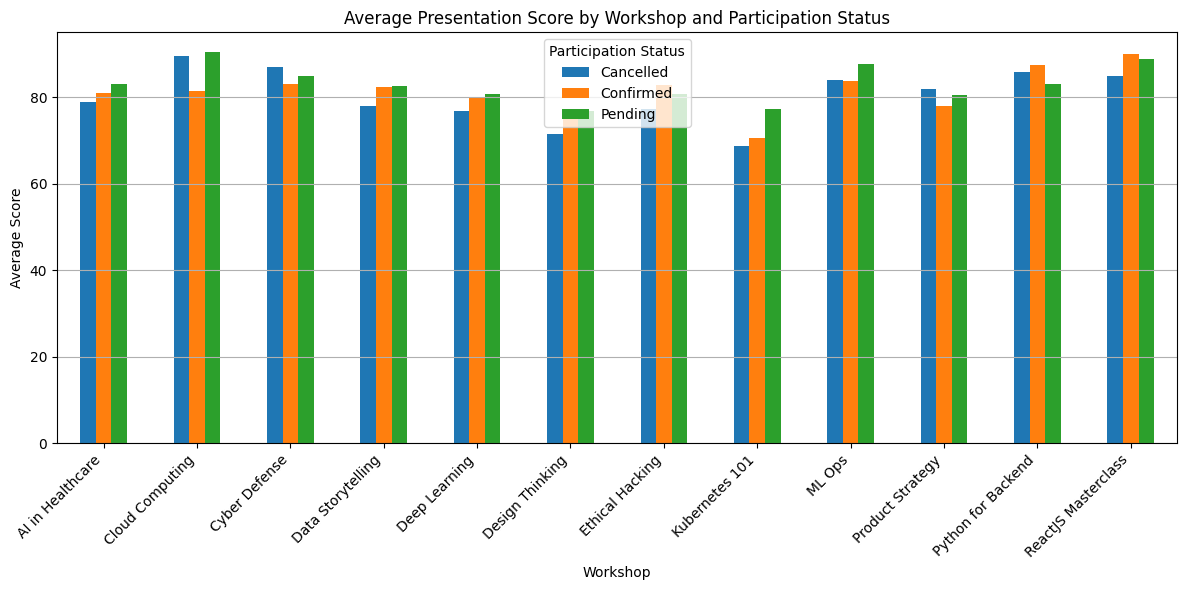

In [88]:
# Plot as grouped bar chart
pivot_filled.plot(kind='bar', figsize=(12, 6))

plt.title('Average Presentation Score by Workshop and Participation Status')
plt.ylabel('Average Score')
plt.xlabel('Workshop')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.legend(title='Participation Status') 
plt.tight_layout()
plt.show()


###  Purpose.
To prepare a clean dataset for creating a pair plot (a matrix of scatter plots) by selecting relevant numeric columns and a categorical hue (for grouping).<br>
### Explanation:
df[['Age', 'Presentation_Score', 'Feedback_Rating', 'Participation_Status']].<br>
Selects only four columns from the dataset df:.<br>
Age: Numeric – participant's age.<br>
Presentation_Score: Numeric – score of participant's presentation.<br>
Feedback_Rating: Numeric – feedback rating received.<br>
Participation_Status: Categorical – used as hue for grouping in the plot (e.g., Confirmed, Cancelled).<br>

#### .dropna()
Removes any rows with missing values from the selected columns.<br>
Ensures that the pair plot will not break due to NaN values.<br>

 ### Importance.
 This step cleans and filters the data before visualization.<br>
Makes sure only complete and relevant data is passed into the next plotting function (like sns.pairplot()).<br>
Numeric variables are needed for scatter plots.<br>
Categorical variable (Participation_Status) is useful for color-coding in visualizations.<br>

In [89]:
# Keep only numeric columns + category for hue
pairplot_data = df[['Age', 'Presentation_Score', 'Feedback_Rating', 'Participation_Status']].dropna()


## Pairplot.
To visually explore relationships between numeric variables (Age, Presentation_Score, and Feedback_Rating) in the dataset, grouped by Participation_Status, using a pairplot.<br>
### Explanation:
#### sns.pairplot(...)
Creates a grid of plots showing pairwise relationships between variables.<br>

#### data=pairplot_data
Uses the cleaned dataset containing:.<br>
Age.<br>
Presentation_Score.<br>
Feedback_Rating.<br>
Participation_Status.<br>
#### hue='Participation_Status'
Groups the data by Participation Status (e.g., Confirmed, Cancelled, Pending).<br>
Each group is color-coded for easy comparison.<br>
#### palette='Set2'
Sets a color scheme for the hue.<br>
Set2 is a soft, visually friendly palette often used for categories.<br>
#### diag_kind='kde'
On the diagonal, instead of histograms, KDE plots (Kernel Density Estimates) are used.<br>
KDE gives a smooth curve to show the distribution of values.<br>
#### height=2.5
Sets the size of each subplot in inches.<br>
Smaller height = more compact plot.<br>

y=1.02 moves the title slightly up above the plot for better spacing.<br>

### Findings.
Scatterplots show relationships between:.<br>
Age vs Feedback.<br>
Age vs Presentation Score.<br>
Feedback vs Presentation Score.<br>
KDE curves on diagonals show how each variable is distributed for different Participation Status groups.<br>
You can visually detect patterns, e.g.:.<br>
Are older participants giving higher feedback?.<br>
Do confirmed participants score better in presentations?.<br>

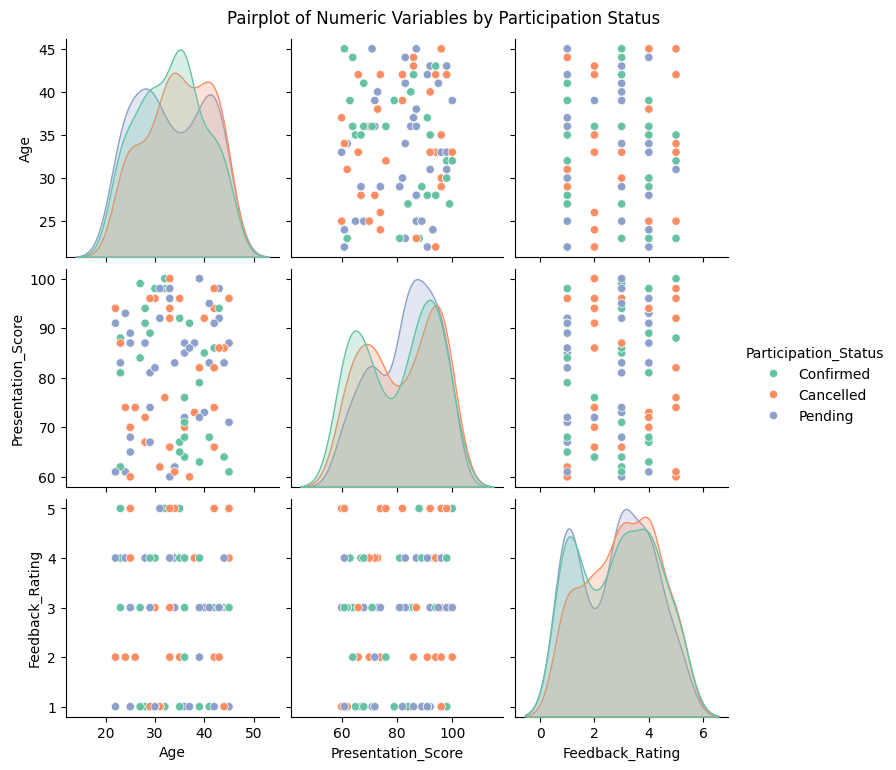

In [90]:
sns.pairplot(
    data=pairplot_data,
    hue='Participation_Status',
    palette='Set2',
    diag_kind='kde',  
    height=2.5
)
plt.suptitle('Pairplot of Numeric Variables by Participation Status', y=1.02)
plt.show()


## Grouped bar chart.
This code creates a grouped bar chart to compare the average feedback rating given in each Workshop, grouped by Participation Status (Confirmed, Cancelled, Pending).<br>
It helps to analyze how each group responded in terms of feedback.<br>
## Explanation:
#### custom_palette.
This defines a custom color for each category in the Participation_Status column.<br>
Ensures better visual distinction and avoids repeated colors.<br>
#### plt.figure.
Sets the size of the figure to be 12 inches wide and 6 inches tall.<br>
x='Workshop'.<br>
Each bar group represents one workshop.<br>
 y='Feedback_Rating'.<br>
The height of each bar shows the average feedback rating given.<br>
 hue='Participation_Status'.<br>
Each bar is divided into groups based on status:.<br>
Confirmed.<br>
Cancelled.<br>
Pending.<br>
estimator='mean'.<br>
Shows the mean (average) feedback rating per group.<br>
errorbar=None.<br>
Removes the default confidence interval lines (cleaner plot).<br>
palette=custom_palette.<br>
Applies the custom colors defined earlier.<br>
plt.title:Adds a title and labels for x-axis and y-axis with specified font sizes.<br>
plt.xticks:.<br>
Rotates x-axis labels 45 degrees to prevent overlap.<br>
ha='right' aligns them nicely.<br>
plt.legend:Places the legend outside the plot (on the right).<br>
This avoids covering any part of the graph.<br>
plt.grid:Shows horizontal grid lines to make it easier to compare bar heights.<br>

### Insights.
How participants of different statuses rated each workshop.<br>
Identify which workshops had the best or worst feedback.<br>
See if there's a pattern or drop in feedback based on status (e.g., did "Cancelled" participants give low feedback?).<br>

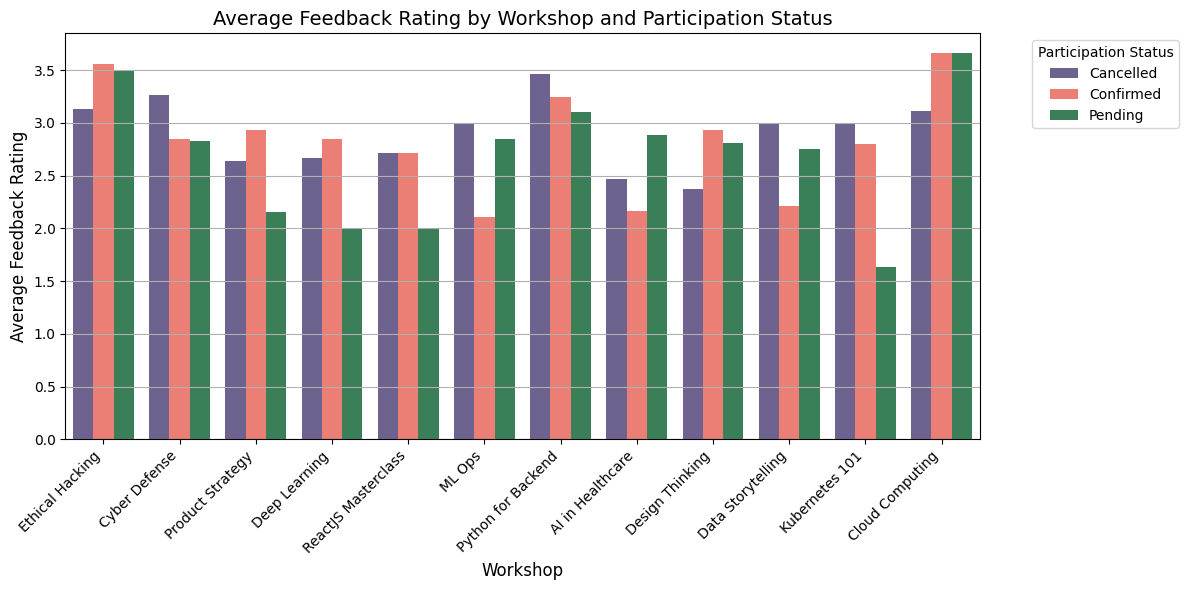

In [91]:
# Add all categories to the color palette
custom_palette = {
    'Confirmed': '#FF6F61',   # Soft Red
    'Cancelled': '#6B5B95',    # Deep Purple
    'Pending': '#2E8B57'  # SeaGreen
}

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df,
    x='Workshop',
    y='Feedback_Rating',
    hue='Participation_Status',
    estimator='mean',
    errorbar=None,  # replaces deprecated ci=None
    palette=custom_palette
)

plt.title('Average Feedback Rating by Workshop and Participation Status', fontsize=14)
plt.xlabel('Workshop', fontsize=12)
plt.ylabel('Average Feedback Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Participation Status', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Grouped bar chart.
This code creates a grouped bar chart (using countplot) to show how many participants from each Profession are present in each City.<br>
It helps to understand city-wise professional distribution of participants in your TechFest 2025 dataset.<br>
### Explanation:
plt.figure:Sets the size of the plot to be 14 inches wide and 6 inches tall, making enough space to accommodate many cities on the x-axis.<br>
data=df → Uses your dataset (df).<br>
x='City' → The x-axis represents cities.<br>
hue='Profession' → Each bar is split/grouped by profession.<br>
This chart counts the number of rows (participants) for each profession in each city.<br>
plt.title:Adds a title and axis labels with custom font sizes for clarity.<br>
plt.xticks(rotation=45, ha='right'):Rotates city names by 45° so they don't overlap.<br>
Aligns them to the right for better readability.<br>
tight_layout() ensures all elements fit without overlapping.<br>
grid(True, axis='y') adds horizontal grid lines to help visually compare bar heights.<br>
show() displays the final chart.<br>

### Findings.
Which cities have the most participants.<br>
The distribution of professions in each city.<br>
Detect if certain professions are more dominant in specific cities.<br>
Spot any cities with very low or high participation.<br>

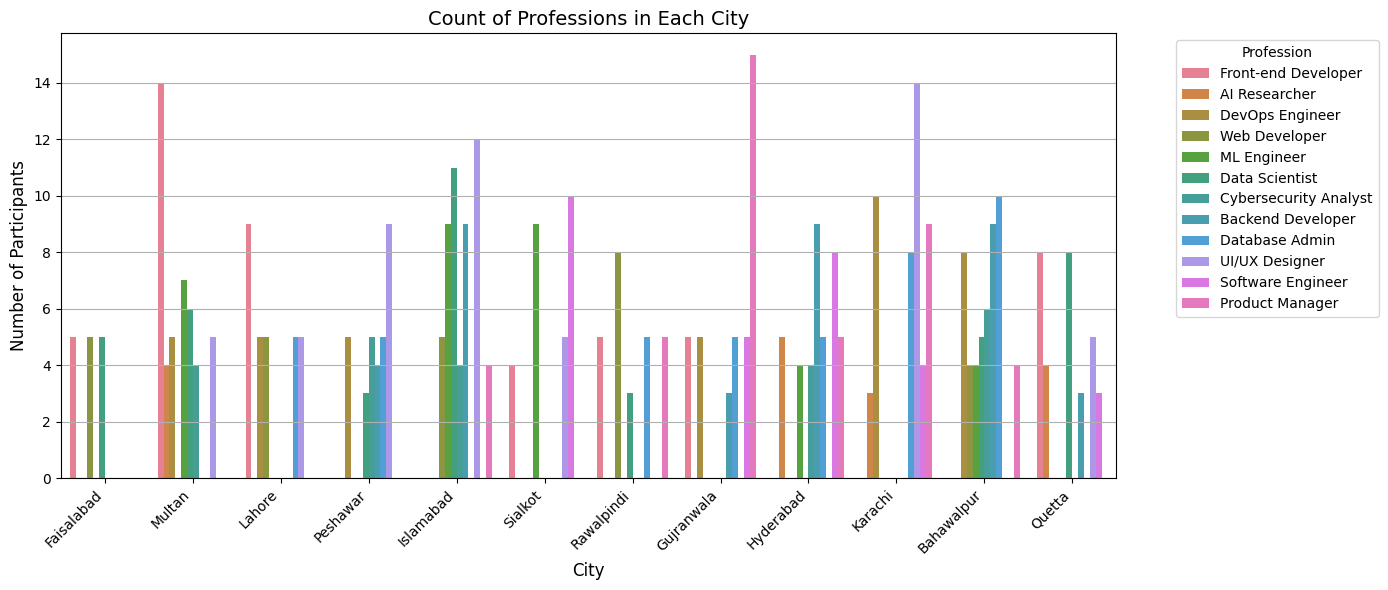

In [92]:
plt.figure(figsize=(14, 6))

sns.countplot(
    data=df,
    x='City',
    hue='Profession'
)

plt.title('Count of Professions in Each City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


## Boxplot.
This code generates a box plot to show the distribution of feedback ratings for each workshop in your TechFest2025 dataset.<br>
It helps identify:.<br>
The spread of ratings,.<br>
Median (average) feedback score,.<br>
Presence of outliers, and
Variability of feedback between different workshops.<br>
### Explanation:
data=df → Uses the main TechFest2025 dataset.<br>
x='Workshop' → Categories shown on the x-axis (each workshop).<br>
y='Feedback_Rating' → Numerical variable on y-axis.<br>
hue='Workshop' → Adds different colors for each workshop box.<br>
palette='Set2' → Uses a pastel color scheme for clarity.<br>
legend=False → Removes the redundant legend (since each color = one workshop already on x-axis).<br>
plt.grid(True, axis='y'):Adds horizontal grid lines to help compare rating levels more easily.<br>
### Findings.
Median feedback (middle line in each box) per workshop.<br>
Range (min to max ratings) and IQR (interquartile range).<br>
Outliers (points outside the whiskers), which can indicate exceptional feedback.<br>
Skewness — whether ratings lean more towards high or low end.<br>
#### Example:
If one workshop has a lower median and wide spread, it may indicate inconsistent or poor performance and could be investigated further.<br>

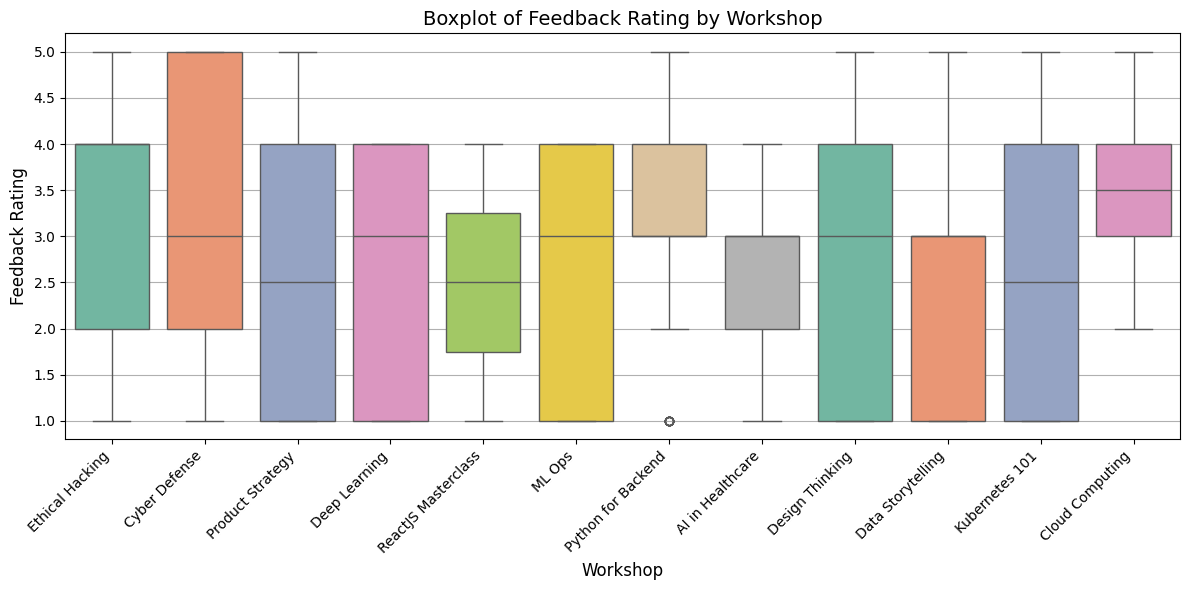

In [93]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x='Workshop',
    y='Feedback_Rating',
    hue='Workshop',       
    palette='Set2',
    legend=False            
)

plt.title('Boxplot of Feedback Rating by Workshop', fontsize=14)
plt.xlabel('Workshop', fontsize=12)
plt.ylabel('Feedback Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Boxplot.
This code generates a box plot to show how presentation scores vary for participants with different participation statuses — such as Confirmed, Pending, or Cancelled.<br>
It helps you understand:.<br>
Which participation status group performed better on average,.<br>
The spread and consistency of presentation scores in each group,.<br>
If there are any outliers in scores,.<br>
### Explanation.
data=df → Uses your TechFest2025 DataFrame..<br>
x='Participation_Status' → Shows status categories on x-axis (Confirmed, Pending, Cancelled).<br>
y='Presentation_Score' → Numerical variable to be plotted (score) on the y-axis.<br>
hue='Participation_Status' → Applies a unique color for each category (even though same as x — legend not needed).<br>
palette='Pastel1' → Uses a soft, light-colored palette for better visuals.<br>
legend=False → Legend is hidden because it would repeat the x-axis categories.<br>
### Findings.
Median Score: Middle line of the box.<br>
IQR (Interquartile Range): Width of the box (middle 50% of scores).<br>
Whiskers: Show score range, excluding outliers.<br>
Outliers: Dots outside the whiskers — unusually high or low scores.<br>
Spread: Helps identify which status group is more consistent or more variable.<br>
### Example.
If "Confirmed" participants have a higher median and less spread, they may have taken presentations more seriously.<br>
If "Pending" has high variability or low medians, there may be issues with uncertainty affecting preparation.<br>

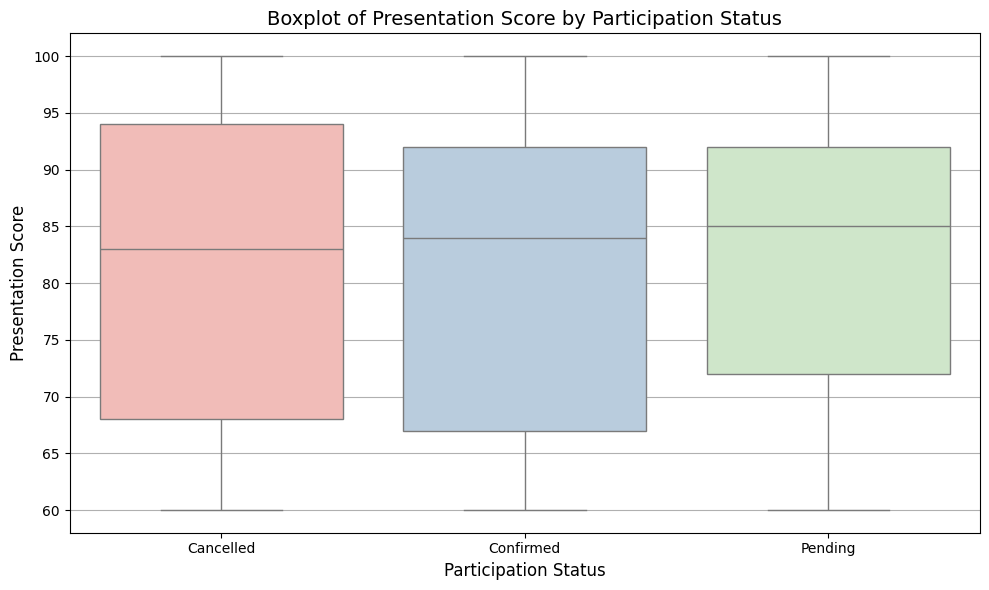

In [94]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='Participation_Status',
    y='Presentation_Score',
    hue='Participation_Status',
    palette='Pastel1',
    legend=False
)

plt.title('Boxplot of Presentation Score by Participation Status', fontsize=14)
plt.xlabel('Participation Status', fontsize=12)
plt.ylabel('Presentation Score', fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


##  stacked histogram.
This code creates a stacked histogram to visualize how presentation scores are distributed across participants based on their participation status (Confirmed, Cancelled, Pending).<br>
It helps to answer:.<br>
Are most participants scoring high or low?.<br>
Do confirmed participants generally score better than others?.<br>
How is the distribution (spread or clustering) of scores for each group?.<br>
### Explanation:
data=df → Uses the TechFest2025 dataset.<br>
x='Presentation_Score' → Score values are plotted along the x-axis.<br>
hue='Participation_Status' → Differentiates categories with colors.<br>
multiple='stack' → Stacks each status category on top of the others for the same score bin.<br>
bins=15 → Divides the range of scores into 15 intervals (customizable).<br>
palette='pastel' → Uses soft, clean color tones.<br>
### Findings.
The shape of the data distribution: Is it normal, skewed, or irregular?.<br>
Which participation status group dominates certain score ranges.<br>
Comparative count: For example, you might see that Confirmed participants are more frequent in higher score bins.<br>
### Example.
If Cancelled participants are mostly in lower bins, they may have been less engaged.<br>
If Confirmed participants dominate higher score ranges, their commitment may reflect in performance.<br>
A skewed distribution (scores clustering more toward one side) may indicate scoring imbalance or trend.<br>

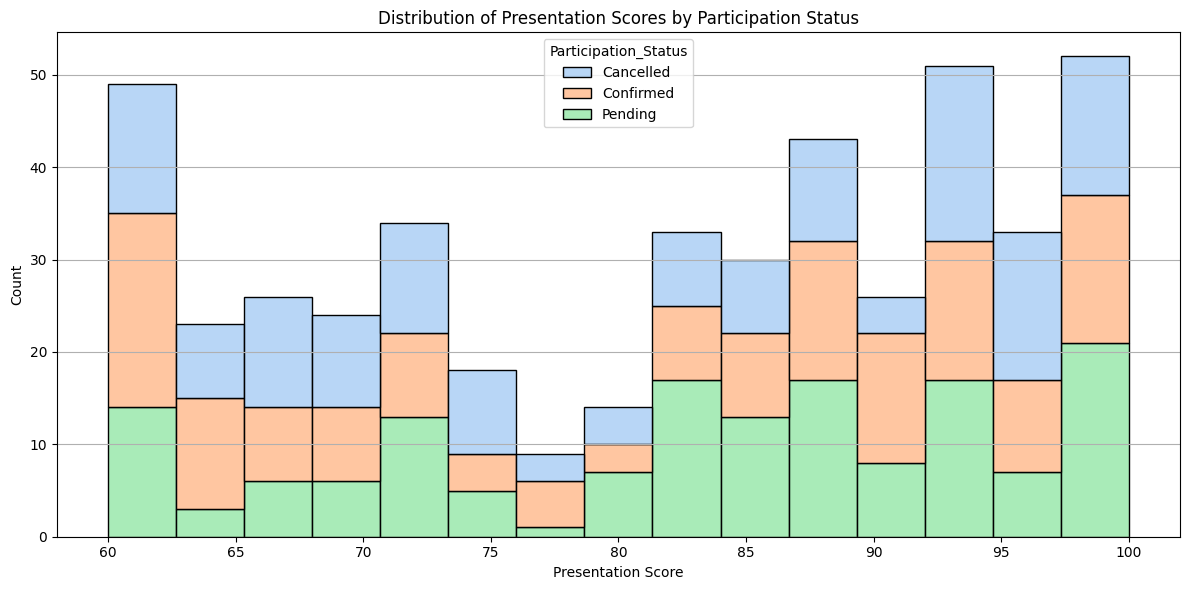

In [95]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Presentation_Score',
    hue='Participation_Status',
    multiple='stack',     # stacked histogram for better comparison
    bins=15,
    palette='pastel'
)

plt.title('Distribution of Presentation Scores by Participation Status')
plt.xlabel('Presentation Score')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## histogram.
This histogram is used to compare how feedback ratings are distributed across different professions of participants.<br>
It visually answers:.<br>
Which professions gave higher or lower feedback ratings?.<br>
How the ratings vary among professions (e.g., Students vs Developers vs Managers)?.<br>
Which rating ranges are most common for each group?.<br>
### Explanation:
data=df → Uses your TechFest2025 dataset.<br>
x='Feedback_Rating' → The x-axis shows feedback scores given by participants.<br>
hue='Profession' → Colors the bars based on profession (e.g., Student, Teacher, Developer).<br>
multiple='dodge' → Displays bars side-by-side for each profession instead of stacking them.<br>
bins=10 → Breaks the feedback rating range into 10 intervals/bars.<br>
palette='Set2' → Uses a visually distinct color palette for each profession.<br>
### Findings.
Variation in feedback ratings by profession.<br>
Which profession gave the most/least feedback in specific rating ranges.<br>
Helps to identify satisfaction trends:.<br>
For example, Developers might be giving mostly high ratings.<br>
Students might have more spread-out ratings.<br>
### Example.
If most of one profession is clustered around high scores, that profession likely had a positive experience.<br>
If the bars for one profession are evenly spread or mostly low, that may indicate mixed or negative feedback.<br>
This can also help organizers target improvements for specific profession groups.<br>

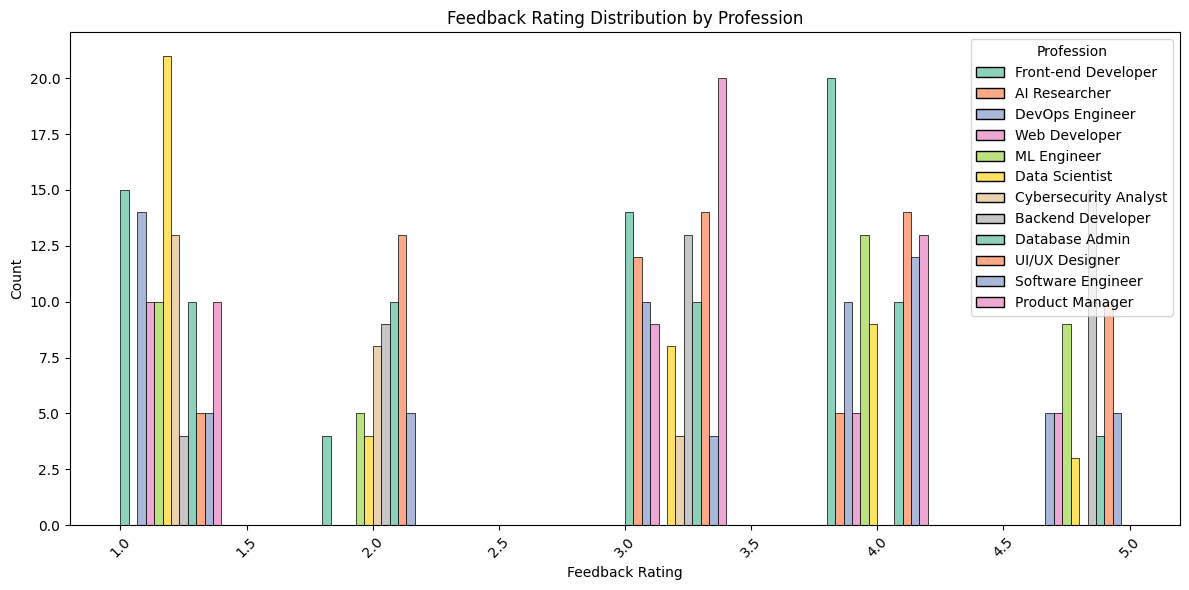

In [96]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Feedback_Rating',
    hue='Profession',
    multiple='dodge',     
    bins=10,
    palette='Set2'
)

plt.title('Feedback Rating Distribution by Profession')
plt.xlabel('Feedback Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Purpose.
This code block calculates the correlation between all numeric variables in your dataset..<br> It helps answer:.<br>
Do numeric features (like age, feedback, scores) move together?.<br>
Are some variables positively or negatively related?.<br>
Which variables have strong associations?.<br>
This is useful in exploratory data analysis (EDA) and helps identify patterns or redundant variables.<br>
### Example:
If Age and Presentation_Score have a value of 0.8, it means as age increases, presentation score tends to increase.<br>
If Feedback_Rating and Age have a value of –0.6, it means older participants tend to give lower ratings.<br>
### Findings.
A table where both rows and columns are numeric variables.<br>
Each cell tells how strongly related two variables are.<br>
Diagonal values are always 1.0 (each variable perfectly correlates with itself).<br>
Symmetric matrix (top right is same as bottom left).<br>

### Usage.
Detect multicollinearity (strongly correlated variables).<br>
Find hidden relationships (e.g., Age might influence scores).<br>
Decide which features might be more valuable for machine learning models.<br>
Remove redundant features with very high correlation.<br>

In [97]:
# Selecting numeric columns only
numeric_df = df.select_dtypes(include='number')

# Show correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix


,Age,Presentation_Score,Feedback_Rating
Age,1.000000,0.069240,-0.030889
Presentation_Score,0.069240,1.000000,0.136701
Feedback_Rating,-0.030889,0.136701,1.000000


## Heatmap. 
The code below creates a heatmap to visually explore how numeric variables in your dataset are correlated with each other.<br>
A heatmap makes it easier to spot:.<br>
Strong or weak correlations.<br>
Positive or negative trends.<br>
Redundancies in variables.<br>
### Explanation:
#### Parameter----------------------------------Purpose
correlation_matrix-------The 2D matrix showing correlation values between numeric variables.<br>
annot=True--------------------Displays the correlation numbers inside each square.<br>
fmt=".2f"---------------------Formats the numbers to 2 decimal places.<br>
cmap="coolwarm"---------------Color gradient: red = positive correlation, blue = negative.<br>
linewidths=0.5----------------Adds lines between squares for better readability.<br>
square=True-------------------Makes each square in the heatmap equally sized.<br>
### Findings.
Dark red (close to +1): Strong positive correlation.<br>
Dark blue (close to -1): Strong negative correlation.<br>
White (close to 0): No or weak correlation.<br>
#### Example:
If you see a dark red square between Age and Presentation_Score, it means older people score higher.<br>
A dark blue square between Feedback_Rating and Age could mean older participants gave lower ratings.<br>
###  Benefits.
Quick visual summary of relationships.<br>
Easier than reading a table of numbers.<br>
Highlights possible feature dependencies.<br>
Helps select or remove features for machine learning.<br>

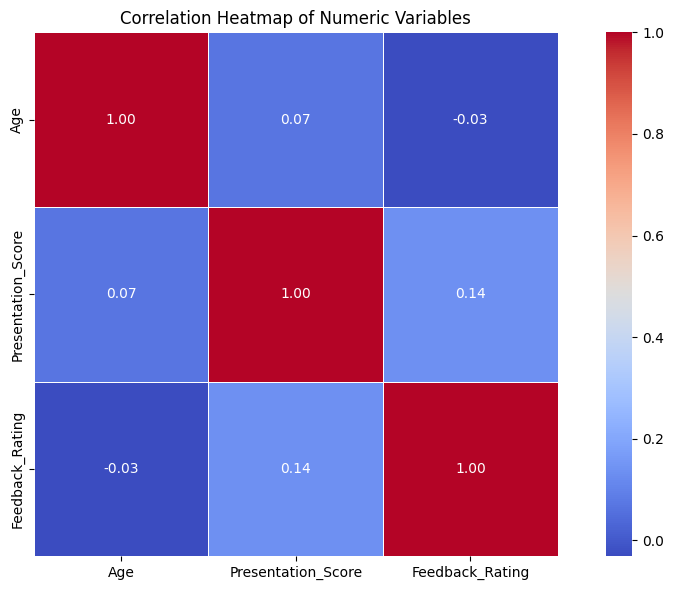

In [98]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()


###  Purpose.
This code is used to calculate the Pearson correlation coefficient between two numeric variables in your dataset:.<br>
Presentation_Score.<br>
Feedback_Rating.<br>
It tells us how strongly these two variables are linearly related.<br>
### Findings.
If the result is positive (e.g. 0.65) → As presentation scores increase, feedback ratings tend to increase.<br>
If the result is negative (e.g. -0.40) → Higher presentation scores are linked to lower feedback ratings.<br>
If it's close to 0 → No meaningful linear relationship.<br>
### Usage.
This correlation helps to understand:.<br>
Whether improving presentation skills (higher scores) is linked to better feedback.<br>
Whether both can be used together to predict participant satisfaction or engagement.<br>

In [99]:
correlation = df['Presentation_Score'].corr(df['Feedback_Rating'])
print(f"Correlation between Presentation Score and Feedback Rating: {correlation:.2f}")


Correlation between Presentation Score and Feedback Rating: 0.14
